# 数据集

In [3]:
import pandas as pd
names = ("age, workclass, fnlwgt, education, education-num, "
         "marital-status, occupation, relationship, race, sex, "
         "capital-gain, capital-loss, hours-per-week, "
         "native-country, income").split(', ')    
data = pd.read_csv('adult.data',names = names)
col_names = data.columns.tolist()
print(col_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [4]:
data.head()#查看数据形式

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.count()#查看各变量样本数

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [6]:
data.describe()#部分变量描述性统计

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# 数据清洗

In [7]:
# 按职业分组、计数并排序
data.groupby('occupation').size().sort_values(ascending=False)

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

In [9]:
# 绘制教育年限直方图
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data.hist(column='education-num', bins=15);
plt.show()

<Figure size 640x480 with 1 Axes>

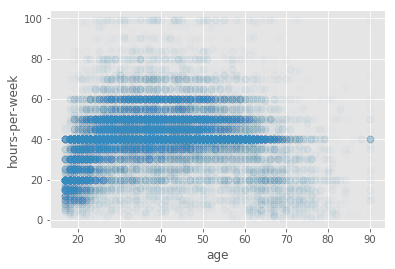

In [10]:
# 以年龄为横坐标、周平均工作时长为纵坐标绘制散点图
data.plot(x='age', y='hours-per-week', kind='scatter',
          alpha=0.02, s=50)

In [11]:
# 将样本数据按照收入水平分组，并计算各组样本数
data.groupby('income')['income'].count()

income
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

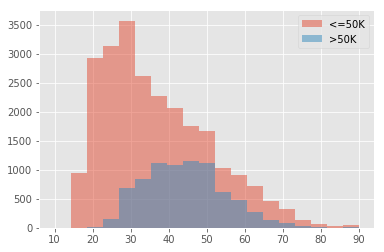

In [13]:
import numpy as np
data['income'].unique()
data = data.dropna() # pandas.DataFrame.dropna 可以删除数据框中的缺失值
data['income'].unique() # 如果变量income中含有缺失值，可在此步验证是否已经将缺失值删除
low_income = data[data['income'] == ' <=50K']
high_income = data[data['income'] == ' >50K']
bins = np.linspace(10, 90, 20)
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, label='<=50K')
plt.hist(high_income['age'].values, bins=bins, alpha=0.5, label='>50K')
plt.legend(loc='best'); # 添加变量标注说明，参数为位置设置
plt.show()

# 模型构建

In [22]:
target = data['income']
features_data = data.drop('income', axis=1)
numeric_features = [c for c in features_data if features_data[c].dtype.kind in ('i', 'f')] # 提取数值类型为整数或浮点数的变量
print(numeric_features)
numeric_data = features_data[numeric_features]
print(numeric_data.head(5))
categorical_data = features_data.drop(numeric_features, 1)
categorical_data.head(5)
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0]) # pd.factorize即可将分类变量转换为数值表示
                                                                                # apply运算将转换函数应用到每一个变量维度
categorical_data_encoded.head(5)
features = pd.concat([numeric_data, categorical_data_encoded], axis=1)
features.head()
X = features.values.astype(np.float32) # 转换数据类型
y = (target.values == ' >50K').astype(np.int32) # 收入水平 ">50K" 记为1，“<=50K” 记为0

from sklearn.cross_validation import train_test_split # sklearn库中train_test_split函数可实现该划分
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0) # 参数test_size设置训练集占比
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
# 建立一个clf的决策树分类器
clf = DecisionTreeClassifier(max_depth=8) # 参数max_depth设置树最大深度
clf.fit(X_train, y_train)

# 交叉验证，评价分类器性能，此处选择的评分标准是ROC曲线下的AUC值，对应AUC更大的分类器效果更好
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc') 
print("ROC AUC Decision Tree: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40
ROC AUC Decision Tree: 0.8969 +/-0.0030


# 预测你的收入

输入一个人所需要的信息参数，我们输入模型里面，通过模型来预测一些它的收入到底是多少呢

'age':年龄,'workclass':工作类型,'fnlwgt':序号,'education':教育水平,'education-num':受教育时间, 
'marital_status':婚姻状况,'occupation':职业,'relationship':关系,'race':种族,'sex':性别,'capital-gain':资本收益, 
'capital-loss':资本损失, 'hours-per-week':每周工作小时数,'native_country':原籍

In [21]:
main_info = pd.DataFrame([{
    'age':50,
    'workclass':2,
    'fnlwgt':284582,
    'education':12,
    'education-num':13, 
    'marital_status':2,
    'occupation':11,
    'relationship':0,
    'race':4,
    'sex':1,
    'capital-gain':0, 
    'capital-loss':0, 
    'hours-per-week':40,
    'native_country':38
}])
main_info.shape
clf.predict(main_info)

array([0], dtype=int32)